<a href="https://colab.research.google.com/github/AbiXnash/HGCNN-LSTM-A-Data-driven-Approach-for-Cyber-Attack-Detection-in-Cyber-Physical-Systems/blob/main/SWAT_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten

from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
import matplotlib.pyplot as plt

from keras.optimizers import Adam

In [ ]:
import random

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SWAT-Dataset/BinaryClass/SWaT_Dataset_Attack_v0.csv')
original_column_names = data.columns.tolist()

In [ ]:
del data[' Timestamp']
data.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
# Store column names
column_names = data.columns.tolist()

# Check if 'Timestamp' column exists
if ' Timestamp' or 'Normal/Attack' in column_names:
    column_names.remove('Normal/Attack')

column_names


['FIT101',
 'LIT101',
 ' MV101',
 'P101',
 'P102',
 ' AIT201',
 'AIT202',
 'AIT203',
 'FIT201',
 ' MV201',
 ' P201',
 ' P202',
 'P203',
 ' P204',
 'P205',
 'P206',
 'DPIT301',
 'FIT301',
 'LIT301',
 'MV301',
 'MV302',
 ' MV303',
 'MV304',
 'P301',
 'P302',
 'AIT401',
 'AIT402',
 'FIT401',
 'LIT401',
 'P401',
 'P402',
 'P403',
 'P404',
 'UV401',
 'AIT501',
 'AIT502',
 'AIT503',
 'AIT504',
 'FIT501',
 'FIT502',
 'FIT503',
 'FIT504',
 'P501',
 'P502',
 'PIT501',
 'PIT502',
 'PIT503',
 'FIT601',
 'P601',
 'P602',
 'P603']

In [ ]:
data.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.0
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,...,0.283806,1.925862,1.0,232.173817,1.013408,174.714484,0.016566,1.0,1.009099,1.0
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,...,0.080924,0.261995,0.0,61.750930,0.412723,47.479809,0.159603,0.0,0.094956,0.0
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,1.000000,1.0,9.468726,0.000000,3.140220,0.000000,1.0,1.000000,1.0
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,...,0.306249,2.000000,1.0,248.029400,0.816967,186.698900,0.000000,1.0,1.000000,1.0
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,...,0.306633,2.000000,1.0,249.295100,0.961138,187.724300,0.000000,1.0,1.000000,1.0
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,...,0.308106,2.000000,1.0,250.881200,1.409669,189.118200,0.000128,1.0,1.000000,1.0
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,0.311693,2.000000,1.0,254.341800,1.970333,191.986000,1.802710,1.0,2.000000,1.0


In [ ]:
data['Normal/Attack'] = data['Normal/Attack'].replace('A ttack', 'Attack')
data['Normal/Attack'].value_counts()

Normal/Attack
Normal    395298
Attack     54621
Name: count, dtype: int64

In [ ]:
X = data.drop(columns = 'Normal/Attack', axis = 1)
Y = data['Normal/Attack']
X.shape, Y.shape

((449919, 51), (449919,))

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, Y_resampled = undersampler.fit_resample(X, Y)

unique_classes, counts = np.unique(Y_resampled, return_counts=True)
class_distribution = dict(zip(unique_classes, counts))

print("Class Distribution after Random Undersampling:")
for class_label, count in class_distribution.items():
   print(f"{class_label}: {count}")

Class Distribution after Random Undersampling:
Attack: 54621
Normal: 54621


In [ ]:
X_resampled.shape, Y_resampled.shape

((109242, 51), (109242,))

In [ ]:
plt.figure(figsize=(16, 8))
sns.stripplot(data=X_resampled, jitter=True, orient="h")
plt.title("Attribute Value Range")
plt.show()

KeyboardInterrupt: 

<Figure size 1600x800 with 0 Axes>

In [ ]:
# Normalize the data in X
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled)

# Encode the data in Y
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_resampled)

In [ ]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X_resampled.columns)
Y_encoded_df = pd.DataFrame({'Encoded_Target': Y_encoded})

In [ ]:
X_normalized_df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.905770,0.853975,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
1,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
2,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
3,0.933457,0.855043,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.981746,0.88983,0.983117,0.000071,0.0,0.0,0.0
4,0.948231,0.855631,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.988492,1.0,0.0,0.982596,0.88983,0.984050,0.000071,0.0,0.0,0.0


In [ ]:
Y_encoded_df.head()

,Encoded_Target
0,0
1,0
2,0
3,0
4,0


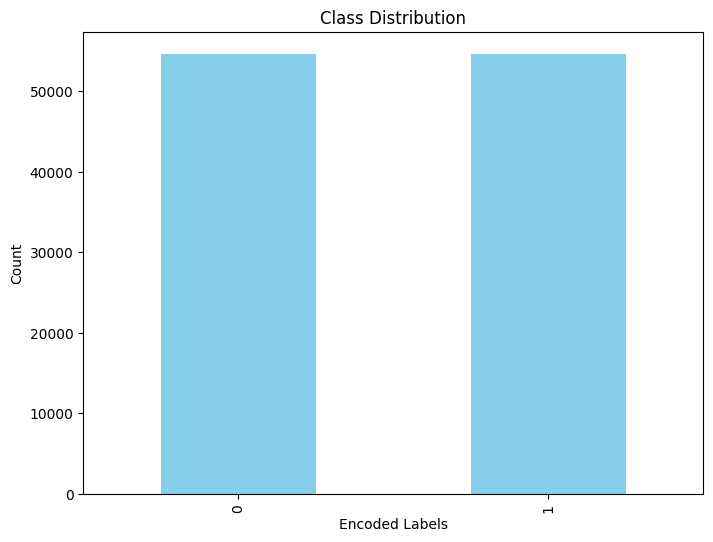

In [ ]:
# Assuming Y_encoded_df has only one column
target_counts = Y_encoded_df.iloc[:, 0].value_counts()

plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Encoded Labels')
plt.ylabel('Count')
plt.show()


In [ ]:
X_normalized.shape

(109242, 51)

In [ ]:
X_normalized_df = pd.DataFrame(X_normalized, columns=column_names)
X_normalized_df.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,109242.000000,...,109242.000000,109242.000000,109242.0,109242.000000,109242.000000,109242.000000,109242.000000,109242.0,109242.000000,109242.0
mean,0.477564,0.638139,0.755337,0.511012,0.027837,0.389035,0.927896,0.427581,0.447393,0.757323,...,0.681191,0.695593,0.0,0.688647,0.410602,0.688961,0.007834,0.0,0.007689,0.0
std,0.461594,0.194181,0.253490,0.499881,0.164507,0.320978,0.051247,0.207657,0.436784,0.252871,...,0.454791,0.460158,0.0,0.443519,0.309511,0.442559,0.081335,0.0,0.087352,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,0.442871,0.500000,0.000000,0.000000,0.132112,0.901405,0.278110,0.000000,0.500000,...,0.000000,0.000000,0.0,0.003206,0.000000,0.004242,0.000000,0.0,0.000000,0.0
50%,0.879362,0.649384,1.000000,1.000000,0.000000,0.250723,0.938451,0.432615,0.861871,1.000000,...,0.983559,1.000000,0.0,0.976119,0.457627,0.973785,0.000000,0.0,0.000000,0.0
75%,0.926128,0.847836,1.000000,1.000000,0.000000,0.670524,0.955099,0.507920,0.867310,1.000000,...,0.984792,1.000000,0.0,0.982335,0.559322,0.981844,0.000036,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


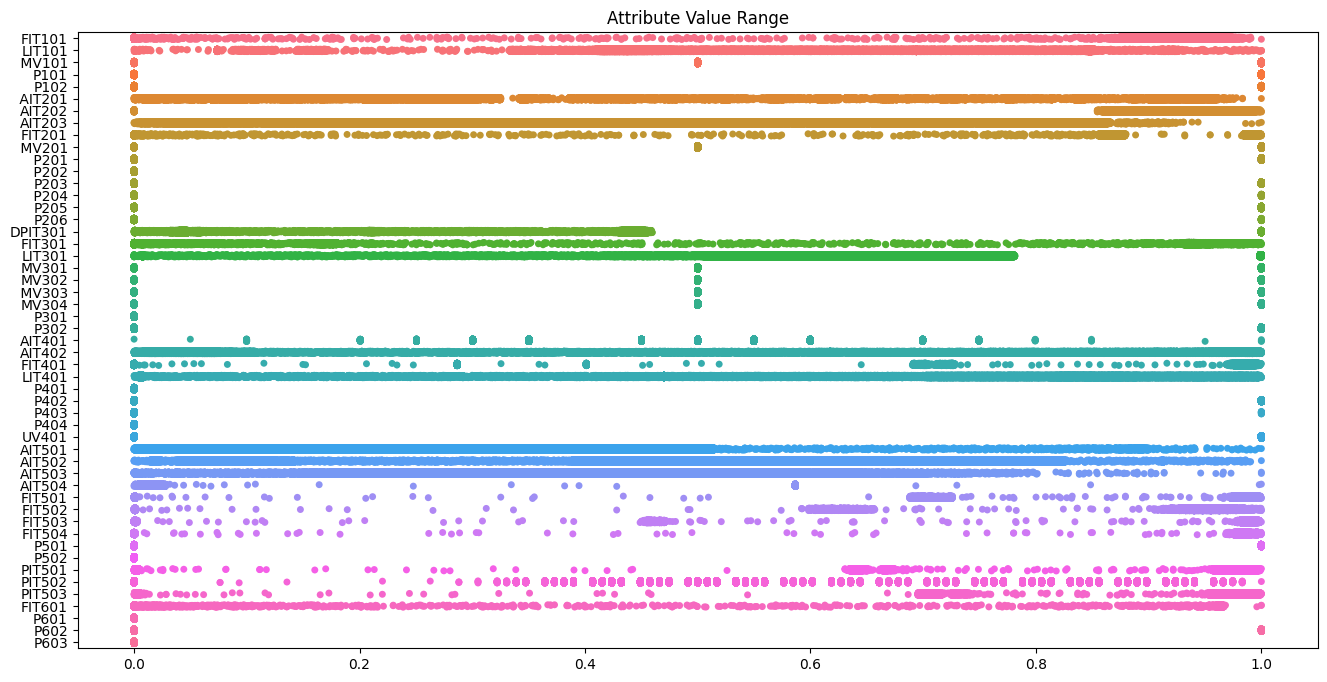

In [ ]:
plt.figure(figsize=(16, 8))
sns.stripplot(data=X_normalized_df, jitter=True, orient="h")
plt.title("Attribute Value Range")
plt.show()

In [ ]:
r, f = X_normalized_df.shape
columns = X_normalized_df.columns

In [ ]:
constant_features = X_normalized_df.columns[X_normalized_df.nunique() == 1]
X_normalized_df.drop(columns=constant_features, inplace=True)

X_normalized_df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,0.905770,0.853975,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.942519,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
1,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.946781,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
2,0.921126,0.854349,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.946781,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
3,0.933457,0.855043,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.953693,0.991713,0.988492,1.0,0.981746,0.88983,0.983117,0.000071,0.0
4,0.948231,0.855631,1.0,0.0,0.0,0.948892,0.901991,0.34848,0.0,0.5,...,0.984135,0.960796,0.991713,0.988492,1.0,0.982596,0.88983,0.984050,0.000071,0.0


In [ ]:
def find_dist(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

dist_arr = np.zeros((f, f))
for i in range(f):
    for j in range(f):
        dist_arr[i][j] = find_dist(X_normalized_df.iloc[i], X_normalized_df.iloc[j])

In [ ]:
dist_arr

array([[0.        , 0.01617155, 0.01617155, ..., 0.04717322, 0.0477956 ,
        0.04823   ],
       [0.01617155, 0.        , 0.        , ..., 0.05448429, 0.055756  ,
        0.05611077],
       [0.01617155, 0.        , 0.        , ..., 0.05448429, 0.055756  ,
        0.05611077],
       ...,
       [0.04717322, 0.05448429, 0.05448429, ..., 0.        , 0.0050234 ,
        0.00535202],
       [0.0477956 , 0.055756  , 0.055756  , ..., 0.0050234 , 0.        ,
        0.00164398],
       [0.04823   , 0.05611077, 0.05611077, ..., 0.00535202, 0.00164398,
        0.        ]])

In [ ]:
np.max(dist_arr)

0.11316673632002282

In [ ]:
threshold_distance = 0.1

while dist_arr.size > 0 and np.max(dist_arr) > threshold_distance:
    max_dist_feature_index = np.unravel_index(np.argmax(dist_arr, axis=None), dist_arr.shape)

    removed_feature = columns[max_dist_feature_index[1]]
    if removed_feature in X_normalized_df.columns:
        X_normalized_df.drop(columns=removed_feature, inplace=True)
        print(f"Removed feature: {removed_feature}")

    dist_arr = np.delete(dist_arr, max_dist_feature_index[1], axis=0)
    dist_arr = np.delete(dist_arr, max_dist_feature_index[1], axis=1)

if dist_arr.size == 0:
    print("All features have been removed.")
else:
    print("\nDataFrame after removing distant features:\n", X_normalized_df)


Removed feature: UV401
Removed feature: P302
Removed feature: P402
Removed feature: MV304

DataFrame after removing distant features:
           FIT101    LIT101   MV101  P101  P102    AIT201    AIT202    AIT203  \
0       0.905770  0.853975     1.0   0.0   0.0  0.948892  0.901991  0.348480   
1       0.921126  0.854349     1.0   0.0   0.0  0.948892  0.901991  0.348480   
2       0.921126  0.854349     1.0   0.0   0.0  0.948892  0.901991  0.348480   
3       0.933457  0.855043     1.0   0.0   0.0  0.948892  0.901991  0.348480   
4       0.948231  0.855631     1.0   0.0   0.0  0.948892  0.901991  0.348480   
...          ...       ...     ...   ...   ...       ...       ...       ...   
109237  0.939739  0.436785     1.0   1.0   0.0  0.061717  0.949354  0.188782   
109238  0.929037  0.444473     1.0   1.0   0.0  0.564770  0.910314  0.428460   
109239  0.879828  0.456806     1.0   1.0   0.0  0.904211  0.869868  0.464295   
109240  0.000000  0.775011     0.5   1.0   0.0  0.062360  0.96623

In [ ]:
X_normalized_df.columns

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', 'P203', ' P204', 'P205', 'P206',
       'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'AIT401',
       'AIT402', 'FIT401', 'LIT401', 'P403', 'AIT501', 'AIT502', 'AIT503',
       'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P602'],
      dtype='object')

In [ ]:
def plot_training_vs_validation(history, model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy Plot
    ax[0].plot(history.history['accuracy'], 'b-', label="Training Accuracy")
    ax[0].plot(history.history['val_accuracy'], 'r-', label="Validation Accuracy")
    ax[0].set_title('Training vs Validation Accuracy - ' + model)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].grid(True)
    ax[0].legend()

    # Loss Plot
    ax[1].plot(history.history['loss'], 'g-', label="Training Loss")
    ax[1].plot(history.history['val_loss'], 'c-', label="Validation Loss")
    ax[1].set_title('Training vs Validation Loss - ' + model)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_normalized_df, Y_encoded, test_size=0.2, random_state=42)

X_train_selected_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_selected_reshaped = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_selected_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(LSTM(units=100, activation='relu', return_sequences=True))
cnn_model.add(Dropout(0.35))
cnn_model.add(LSTM(units=60, activation='relu'))
cnn_model.add(Dropout(0.15))
cnn_model.add(Dense(units=10, activation='softmax'))

adam_optimizer = Adam(learning_rate=1e-4)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_cnn.h5', monitor='val_loss', save_best_only=True)
]

cnn_history = cnn_model.fit(
    X_train_selected_reshaped, Y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val_selected_reshaped, Y_val),
    callbacks=callbacks
)

Epoch 1/50
342/342 [==============================] - 52s 143ms/step - loss: 1.0604 - accuracy: 0.5749 - val_loss: 0.4399 - val_accuracy: 0.7820
Epoch 2/50
  1/342 [..............................] - ETA: 39s - loss: 0.4842 - accuracy: 0.7773

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


342/342 [==============================] - 48s 141ms/step - loss: 0.4429 - accuracy: 0.7878 - val_loss: 0.4161 - val_accuracy: 0.7945
Epoch 3/50
182/342 [==============>...............] - ETA: 27s - loss: 0.4240 - accuracy: 0.7977

KeyboardInterrupt: 

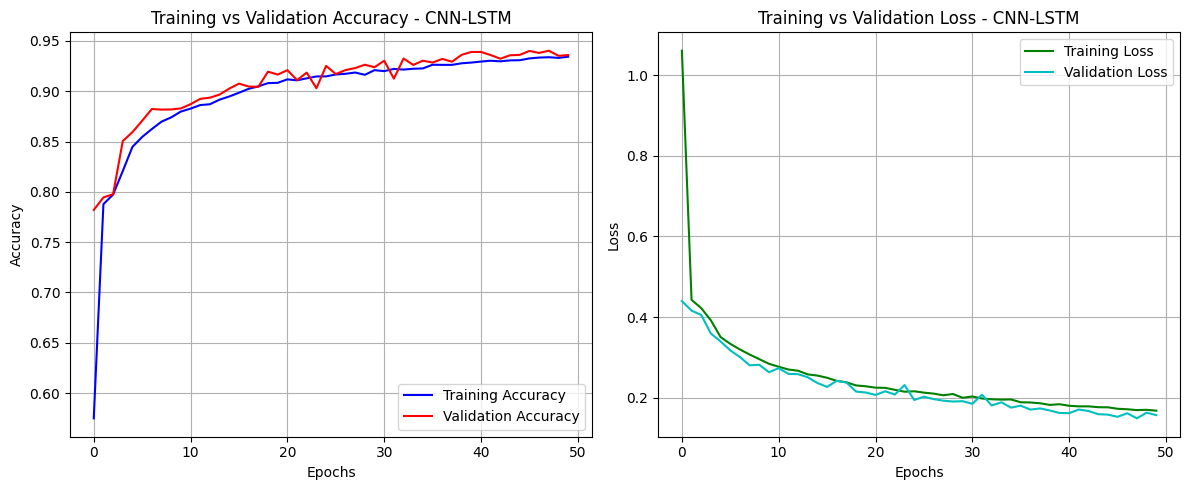

In [ ]:
plot_training_vs_validation(cnn_history,"CNN")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

X_train, X_test, Y_train, Y_test = train_test_split(X_normalized_df, Y_encoded, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

X_train_selected_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_selected_reshaped = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_selected_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_selected_reshaped.shape[1], 1)))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(units=200, activation='relu', return_sequences=True))
cnn_lstm_model.add(Dropout(0.35))
cnn_lstm_model.add(LSTM(units=100, activation='relu'))
cnn_lstm_model.add(Dropout(0.25))
cnn_lstm_model.add(Dense(units=20, activation='softmax'))

adam_optimizer = Adam(learning_rate=0.0002)

cnn_lstm_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_cnn_lstm.h5', monitor='val_loss', save_best_only=True)
]

cnn_lstm_history = cnn_lstm_model.fit(
    X_train_selected_reshaped, Y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val_selected_reshaped, Y_val),
    callbacks=callbacks
)

Epoch 1/50
299/299 [==============================] - 104s 332ms/step - loss: 0.8215 - accuracy: 0.6858 - val_loss: 0.4138 - val_accuracy: 0.8037
Epoch 2/50
299/299 [==============================] - 101s 338ms/step - loss: 0.4014 - accuracy: 0.8098 - val_loss: 0.3775 - val_accuracy: 0.8214
Epoch 3/50
299/299 [==============================] - 102s 340ms/step - loss: 0.3502 - accuracy: 0.8450 - val_loss: 0.3198 - val_accuracy: 0.8601
Epoch 4/50
299/299 [==============================] - 102s 341ms/step - loss: 0.3142 - accuracy: 0.8659 - val_loss: 0.2824 - val_accuracy: 0.8888
Epoch 5/50
299/299 [==============================] - 102s 343ms/step - loss: 0.2887 - accuracy: 0.8788 - val_loss: 0.3018 - val_accuracy: 0.8677
Epoch 6/50
299/299 [==============================] - 106s 353ms/step - loss: 0.2875 - accuracy: 0.8799 - val_loss: 0.2828 - val_accuracy: 0.8780
Epoch 7/50
299/299 [==============================] - 105s 350ms/step - loss: 0.2716 - accuracy: 0.8896 - val_loss: 0.2598 -

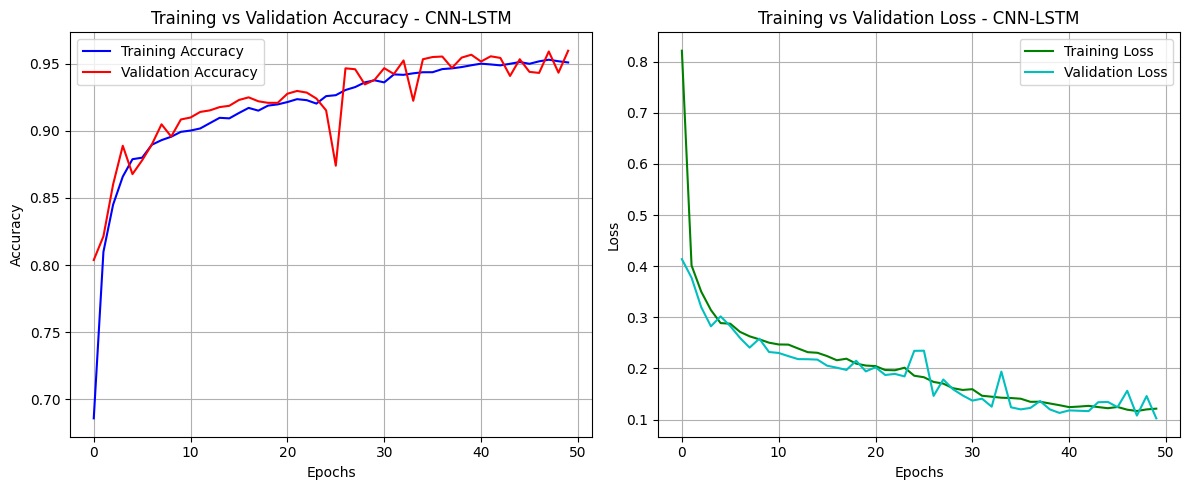

In [ ]:
plot_training_vs_validation(cnn_lstm_history,"CNN-LSTM")

In [ ]:
def evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val_reshaped = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
    X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

    train_loss, train_accuracy = model.evaluate(X_train_reshaped, Y_train)
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Training Accuracy: {train_accuracy:.4f}')

    val_loss, val_accuracy = model.evaluate(X_val_reshaped, Y_val)
    print(f'Validation Loss: {val_loss:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

    test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test)
    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
evaluate_model(cnn_lstm_model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

2390/2390 [==============================] - 73s 30ms/step - loss: 0.0995 - accuracy: 0.9599
Training Loss: 0.0995
Training Accuracy: 0.9599
513/513 [==============================] - 16s 30ms/step - loss: 0.1024 - accuracy: 0.9596
Validation Loss: 0.1024
Validation Accuracy: 0.9596
513/513 [==============================] - 15s 30ms/step - loss: 0.1021 - accuracy: 0.9599
Test Loss: 0.1021
Test Accuracy: 0.9599


In [ ]:
evaluate_model(cnn_model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

2390/2390 [==============================] - 29s 12ms/step - loss: 0.1601 - accuracy: 0.9352
Training Loss: 0.1601
Training Accuracy: 0.9352
513/513 [==============================] - 6s 12ms/step - loss: 0.1552 - accuracy: 0.9362
Validation Loss: 0.1552
Validation Accuracy: 0.9362
513/513 [==============================] - 7s 14ms/step - loss: 0.1549 - accuracy: 0.9378
Test Loss: 0.1549
Test Accuracy: 0.9378


In [ ]:
import pandas as pd

# Define a list of file paths
file_paths = []
# Indices to exclude
excluded_indices = [5, 9, 12, 15, 18]

# Loop through each file and read it into a DataFrame
for i in range(1, 42):
    if i not in excluded_indices:
        file_paths.append(f"/content/drive/MyDrive/SWAT-Dataset/MultiClass/attack{i}.csv")

In [ ]:
len(file_paths)

36

In [ ]:
attack_datasets = []

for idx, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path, header=None)
    df[52] = df[52].replace('A ttack', 'Attack')
    df[52] = df[52].replace('Attack ', 'Attack')
    attack = "Attack"+str(idx)
    df[52] = df[52].replace('Attack', attack)
    last_col_name = df.columns[-1]
    labels = df[last_col_name]
    df = df.iloc[:, 1:]
    attack_datasets.append(df)

# Concatenate the DataFrames into a single DataFrame
attack_data = pd.concat(attack_datasets, ignore_index=True)
attack_data.fillna(0, inplace=True)
# Display the combined DataFrame
attack_data.head()


,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,2.493675,817.6742,2,1,1,262.625,8.46533,319.7385,0.0,1,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack0
1,2.535951,817.9490,2,1,1,262.625,8.46533,319.7385,0.0,1,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack0
2,2.535951,817.9490,2,1,1,262.625,8.46533,319.7385,0.0,1,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack0
3,2.569900,818.4592,2,1,1,262.625,8.46533,319.7385,0.0,1,...,2,1,249.8718,1.681991,188.7977,0.000128,1,1,1,Attack0
4,2.610575,818.8911,2,1,1,262.625,8.46533,319.7385,0.0,1,...,2,1,250.0801,1.681991,188.9740,0.000128,1,1,1,Attack0


In [ ]:
attack_data.shape

(54000, 52)

In [ ]:
# Print the unique values of the last row
print(len(attack_data[52].unique()))


37


In [ ]:

attack_data[52].value_counts()

52
Attack22    34209
Attack21     1691
Attack35     1690
Attack20     1445
Attack24     1171
Attack6       964
Attack0       940
Attack15      721
Attack12      717
Attack17      697
Attack19      612
Attack26      601
Attack8       561
Attack30      540
Attack29      481
Attack31      469
Attack16      463
Attack27      444
Attack1       443
Attack10      431
Attack5       429
Attack33      401
Attack14      395
Attack3       390
Attack25      367
Attack2       363
Attack18      321
Attack34      297
Attack32      281
Attack11      276
Attack13      259
Attack9       233
Attack4       196
Attack7       160
Attack23      121
Normal        120
Attack28      101
Name: count, dtype: int64

In [ ]:
print(attack_data[52].unique())

['Attack0' 'Attack1' 'Normal' 'Attack2' 'Attack3' 'Attack4' 'Attack5'
 'Attack6' 'Attack7' 'Attack8' 'Attack9' 'Attack10' 'Attack11' 'Attack12'
 'Attack13' 'Attack14' 'Attack15' 'Attack16' 'Attack17' 'Attack18'
 'Attack19' 'Attack20' 'Attack21' 'Attack22' 'Attack23' 'Attack24'
 'Attack25' 'Attack26' 'Attack27' 'Attack28' 'Attack29' 'Attack30'
 'Attack31' 'Attack32' 'Attack33' 'Attack34' 'Attack35']


In [ ]:
X = attack_data.drop(columns = 52, axis = 1)
Y = attack_data[52]
X.shape, Y.shape

((54000, 51), (54000,))

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, Y_resampled = undersampler.fit_resample(X, Y)

unique_classes, counts = np.unique(Y_resampled, return_counts=True)
class_distribution = dict(zip(unique_classes, counts))

print("Class Distribution after Random Undersampling:")
for class_label, count in class_distribution.items():
   print(f"{class_label}: {count}")

Class Distribution after Random Undersampling:
Attack0: 940
Attack1: 443
Attack10: 431
Attack11: 276
Attack12: 717
Attack13: 259
Attack14: 395
Attack15: 721
Attack16: 463
Attack17: 697
Attack18: 321
Attack19: 612
Attack2: 363
Attack20: 1445
Attack21: 1691
Attack22: 101
Attack23: 121
Attack24: 1171
Attack25: 367
Attack26: 601
Attack27: 444
Attack28: 101
Attack29: 481
Attack3: 390
Attack30: 540
Attack31: 469
Attack32: 281
Attack33: 401
Attack34: 297
Attack35: 1690
Attack4: 196
Attack5: 429
Attack6: 964
Attack7: 160
Attack8: 561
Attack9: 233
Normal: 120


In [ ]:
X_resampled.shape, Y_resampled.shape

((19892, 51), (19892,))

In [ ]:
# Normalize the data in X
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled)

# Encode the data in Y
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_resampled)

In [ ]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X_resampled.columns)
Y_encoded_df = pd.DataFrame({'Encoded_Target': Y_encoded})

In [ ]:
X_normalized_df.head()

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,0.923387,0.853975,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.988695,1.0,0.0,0.986645,0.88983,0.986455,0.000074,0.0,0.0,0.0
1,0.939042,0.854349,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.988695,1.0,0.0,0.986645,0.88983,0.986455,0.000074,0.0,0.0,0.0
2,0.939042,0.854349,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.988695,1.0,0.0,0.986645,0.88983,0.986455,0.000074,0.0,0.0,0.0
3,0.951613,0.855043,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.988695,1.0,0.0,0.986645,0.88983,0.986455,0.000074,0.0,0.0,0.0
4,0.966674,0.855631,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.988695,1.0,0.0,0.987501,0.88983,0.987392,0.000074,0.0,0.0,0.0


In [ ]:
Y_encoded_df.head()

,Encoded_Target
0,0
1,0
2,0
3,0
4,0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Encoded_Target']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Encoded_Target'}, axis=1)
              .sort_values('Encoded_Target', ascending=True))
  xs = counted['Encoded_Target']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Encoded_Target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Encoded_Target')
_ = plt.ylabel('count()')

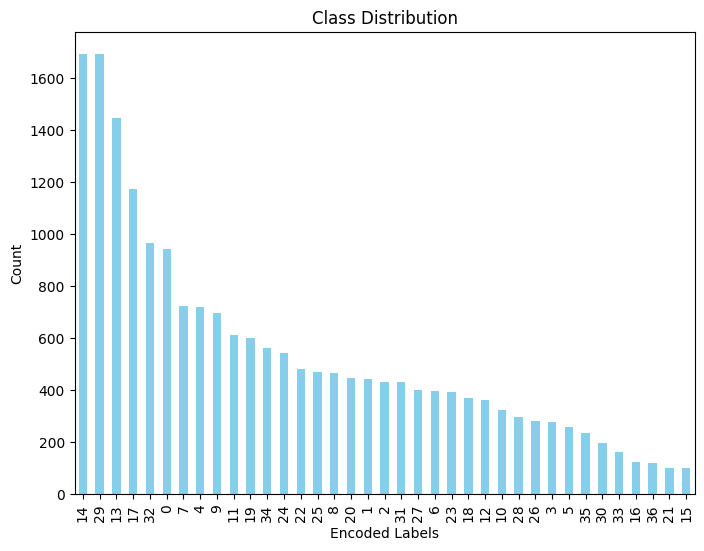

In [ ]:
# Assuming Y_encoded_df has only one column
target_counts = Y_encoded_df.iloc[:, 0].value_counts()

plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Encoded Labels')
plt.ylabel('Count')
plt.show()


In [ ]:
X_normalized.shape

(19892, 51)

In [ ]:
X_normalized_df = pd.DataFrame(X_normalized, columns=column_names)
X_normalized_df.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,19892.000000,19892.000000,19892.000000,19892.000000,19892.000000,19892.000000,19892.000000,19892.000000,19892.000000,19892.000000,...,19892.000000,19892.000000,19892.0,19892.000000,19892.000000,19892.000000,19892.000000,19892.0,19892.000000,19892.0
mean,0.735912,0.549755,0.886638,0.698974,0.152272,0.501930,0.920422,0.373401,0.629366,0.863789,...,0.897415,0.931932,0.0,0.951249,0.614061,0.954096,0.017860,0.0,0.016992,0.0
std,0.389543,0.181563,0.214345,0.458715,0.359294,0.395009,0.096042,0.167100,0.408970,0.228019,...,0.280931,0.251868,0.0,0.113287,0.265469,0.099295,0.123602,0.0,0.129243,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.897296,0.428563,1.000000,0.000000,0.000000,0.118683,0.889479,0.224090,0.000000,0.500000,...,0.983350,1.000000,0.0,0.978686,0.466102,0.974188,0.000000,0.0,0.000000,0.0
50%,0.929554,0.464601,1.000000,1.000000,0.000000,0.443817,0.929044,0.413009,0.866041,1.000000,...,0.984378,1.000000,0.0,0.984014,0.542373,0.980918,0.000037,0.0,0.000000,0.0
75%,0.961338,0.693919,1.000000,1.000000,0.000000,0.957780,0.965055,0.516340,0.870212,1.000000,...,0.989517,1.000000,0.0,0.987172,0.838983,0.985859,0.000074,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0


In [ ]:
r, f = X_normalized_df.shape
columns = X_normalized_df.columns

In [ ]:
constant_features = X_normalized_df.columns[X_normalized_df.nunique() == 1]
X_normalized_df.drop(columns=constant_features, inplace=True)

X_normalized_df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,0.923387,0.853975,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.98485,0.942675,0.993424,0.988695,1.0,0.986645,0.88983,0.986455,0.000074,0.0
1,0.939042,0.854349,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.98485,0.946940,0.993424,0.988695,1.0,0.986645,0.88983,0.986455,0.000074,0.0
2,0.939042,0.854349,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.98485,0.946940,0.993424,0.988695,1.0,0.986645,0.88983,0.986455,0.000074,0.0
3,0.951613,0.855043,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.98485,0.953856,0.993424,0.988695,1.0,0.986645,0.88983,0.986455,0.000074,0.0
4,0.966674,0.855631,1.0,0.0,0.0,0.973405,0.911394,0.385932,0.0,0.5,...,0.98485,0.960963,0.993424,0.988695,1.0,0.987501,0.88983,0.987392,0.000074,0.0


In [ ]:
def find_dist(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

dist_arr = np.zeros((f, f))
for i in range(f):
    for j in range(f):
        dist_arr[i][j] = find_dist(X_normalized_df.iloc[i], X_normalized_df.iloc[j])

In [ ]:
dist_arr

array([[0.        , 0.01664435, 0.01664435, ..., 0.04751344, 0.04819528,
        0.04862619],
       [0.01664435, 0.        , 0.        , ..., 0.05502272, 0.05635345,
        0.05670455],
       [0.01664435, 0.        , 0.        , ..., 0.05502272, 0.05635345,
        0.05670455],
       ...,
       [0.04751344, 0.05502272, 0.05502272, ..., 0.        , 0.00517649,
        0.00549615],
       [0.04819528, 0.05635345, 0.05635345, ..., 0.00517649, 0.        ,
        0.00164474],
       [0.04862619, 0.05670455, 0.05670455, ..., 0.00549615, 0.00164474,
        0.        ]])

In [ ]:
np.max(dist_arr)

0.11431837390429926

In [ ]:
threshold_distance = 0.1

while dist_arr.size > 0 and np.max(dist_arr) > threshold_distance:
    max_dist_feature_index = np.unravel_index(np.argmax(dist_arr, axis=None), dist_arr.shape)

    removed_feature = columns[max_dist_feature_index[1]]
    if removed_feature in X_normalized_df.columns:
        X_normalized_df.drop(columns=removed_feature, inplace=True)
        print(f"Removed feature: {removed_feature}")

    dist_arr = np.delete(dist_arr, max_dist_feature_index[1], axis=0)
    dist_arr = np.delete(dist_arr, max_dist_feature_index[1], axis=1)

if dist_arr.size == 0:
    print("All features have been removed.")
else:
    print("\nDataFrame after removing distant features:\n", X_normalized_df)


Removed feature: UV401
Removed feature: P302
Removed feature: MV304

DataFrame after removing distant features:
          FIT101    LIT101   MV101  P101  P102    AIT201    AIT202    AIT203  \
0      0.923387  0.853975     1.0   0.0   0.0  0.973405  0.911394  0.385932   
1      0.939042  0.854349     1.0   0.0   0.0  0.973405  0.911394  0.385932   
2      0.939042  0.854349     1.0   0.0   0.0  0.973405  0.911394  0.385932   
3      0.951613  0.855043     1.0   0.0   0.0  0.973405  0.911394  0.385932   
4      0.966674  0.855631     1.0   0.0   0.0  0.973405  0.911394  0.385932   
...         ...       ...     ...   ...   ...       ...       ...       ...   
19887  0.970588  0.540265     1.0   0.0   0.0  0.980718  0.905471  0.346405   
19888  0.966319  0.541625     1.0   0.0   0.0  0.980718  0.905471  0.346405   
19889  0.965726  0.542985     1.0   0.0   0.0  0.980718  0.905115  0.346405   
19890  0.965251  0.544345     1.0   0.0   0.0  0.980718  0.904404  0.346405   
19891  0.960863  0

In [ ]:
X_normalized_df.columns

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', 'P203', ' P204', 'P205', 'P206',
       'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'AIT401',
       'AIT402', 'FIT401', 'LIT401', 'P402', 'AIT501', 'AIT502', 'AIT503',
       'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P602'],
      dtype='object')

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_normalized_df, Y_encoded, test_size=0.2, random_state=42)

X_train_selected_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_selected_reshaped = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=52, kernel_size=3, activation='relu', input_shape=(X_train_selected_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(LSTM(units=200, activation='relu', return_sequences=True))
cnn_model.add(Dropout(0.45))
cnn_model.add(LSTM(units=100, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units=37, activation='softmax'))

adam_optimizer = Adam(learning_rate=1e-4)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_cnn.h5', monitor='val_loss', save_best_only=True)
]

cnn_history = cnn_model.fit(
    X_train_selected_reshaped, Y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val_selected_reshaped, Y_val),
    callbacks=callbacks
)

Epoch 1/50
63/63 [==============================] - 27s 365ms/step - loss: 3.5741 - accuracy: 0.0691 - val_loss: 3.4100 - val_accuracy: 0.0983
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 18s 289ms/step - loss: 3.3806 - accuracy: 0.0779 - val_loss: 3.2829 - val_accuracy: 0.0897
Epoch 3/50
63/63 [==============================] - 17s 276ms/step - loss: 3.3018 - accuracy: 0.0765 - val_loss: 3.2052 - val_accuracy: 0.0870
Epoch 4/50
63/63 [==============================] - 18s 282ms/step - loss: 3.2091 - accuracy: 0.0818 - val_loss: 3.1201 - val_accuracy: 0.2051
Epoch 5/50
63/63 [==============================] - 19s 301ms/step - loss: 3.0441 - accuracy: 0.1134 - val_loss: 2.9264 - val_accuracy: 0.2121
Epoch 6/50
63/63 [==============================] - 17s 275ms/step - loss: 2.7692 - accuracy: 0.1599 - val_loss: 2.4651 - val_accuracy: 0.3395
Epoch 7/50
63/63 [==============================] - 17s 272ms/step - loss: 2.5451 - accuracy: 0.2381 - val_loss: 2.3152 - val_accuracy: 0.3036
Epoch 8/50
63/63 [==============================] - 17s 273ms/step - loss: 2.3477 - accuracy: 0.3057 - val_loss: 2.0938 - val_accuracy: 0.4029
Epoch 9/50

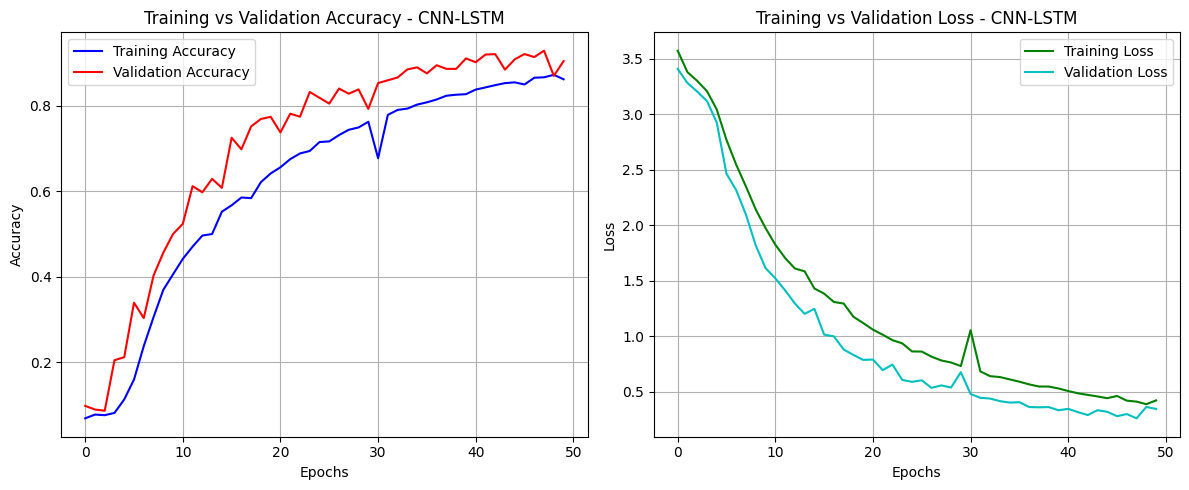

In [ ]:
plot_training_vs_validation(cnn_history,"CNN-LSTM")

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for the test data
y_probabilities = cnn_model.predict(X_train_selected_reshaped)

# Convert probabilities to class labels by taking the class with the highest probability
y_pred = y_probabilities.argmax(axis=-1)

# Print classification report
print(classification_report(Y_train, y_pred))

498/498 [==============================] - 15s 31ms/step
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       779
           1       1.00      0.92      0.96       354
           2       0.03      0.02      0.02       357
           3       0.94      0.87      0.90       229
           4       0.64      0.62      0.63       549
           5       0.90      0.27      0.41       207
           6       1.00      0.93      0.96       323
           7       1.00      0.97      0.98       567
           8       0.99      1.00      0.99       362
           9       0.98      0.99      0.98       566
          10       0.95      0.74      0.83       261
          11       0.98      1.00      0.99       486
          12       0.78      0.78      0.78       292
          13       0.99      0.99      0.99      1156
          14       0.99      1.00      1.00      1300
          15       0.93      0.92      0.92        83
          16       0.97 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
